# Importing Libraries 
**The following imported libraries will be used for our covid data visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
%matplotlib inline

import datetime 
import geopandas as gpd

import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.float_format",lambda x: "%.2f" % x)

In [3]:
#importing data using pandas,geopandas

df_covid = pd.read_csv("covid_de.csv")
df_dmo = pd.read_csv("demographics_de.csv")

#reading .shp (shapeFile) file using geopandas. geopandas extends the datatypes used by pandas
df_mp = gpd.read_file("de_state.shp")
df_mp_country = gpd.read_file("de_county.shp")

In [7]:
df_mp_country

,ADE,GF,BSG,RS,AGS,SDV_RS,GEN,BEZ,IBZ,BEM,...,SN_V1,SN_V2,SN_G,FK_S3,NUTS,RS_0,AGS_0,WSK,DEBKG_ID,geometry
0,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL1000055UK,"POLYGON ((3527924.046 6075754.730, 3527955.026..."
1,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL1000055TK,"POLYGON ((3577255.666 6031939.279, 3577509.282..."
2,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL1000055W1,"POLYGON ((3623798.629 5982634.490, 3623806.046..."
3,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,40,--,...,00,00,000,R,DEF04,010040000000,01004000,1970-04-26,DEBKGDL10000560Q,"POLYGON ((3566670.956 6001187.313, 3566515.888..."
4,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,42,--,...,00,00,000,R,DEF05,010510000000,01051000,2011-08-01,DEBKGDL10000563M,"MULTIPOLYGON (((3504680.841 6025846.694, 35048..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,4,2,1,04012,04012,040120000000,Bremerhaven,Kreisfreie Stadt,40,--,...,00,00,000,R,DE502,040120000000,04012000,2010-01-01,DEBKGDL10000561H,"POLYGON ((3471873.518 5934226.127, 3471922.937..."
421,4,2,1,13003,13003,130030000000,Rostock,Kreisfreie Stadt,40,--,...,00,00,000,R,DE803,130030000000,13003000,2007-01-01,DEBKGDL1000055TM,"POLYGON ((3703953.080 6009743.796, 3704254.374..."
422,4,2,1,13073,13073,130730088088,Vorpommern-Rügen,Landkreis,43,--,...,00,00,000,R,DE80L,130730000000,13073000,2011-09-04,DEBKGDL100007C38,"MULTIPOLYGON (((3722714.216 6032452.373, 37231..."
423,4,2,1,13074,13074,130740087087,Nordwestmecklenburg,Landkreis,43,--,...,00,00,000,R,DE80M,130740000000,13074000,2011-09-04,DEBKGDL100005C67,"POLYGON ((3648170.858 5985236.890, 3648039.275..."


In [5]:
#first 5 items of our dataset

df_covid


,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
...,...,...,...,...,...,...,...,...
416309,Thueringen,SK Weimar,80-99,M,2020-12-26,4,1,0
416310,Thueringen,SK Weimar,80-99,M,2020-12-28,1,0,0
416311,Thueringen,SK Weimar,80-99,M,2020-12-30,2,0,0
416312,Thueringen,SK Weimar,80-99,M,2020-12-31,1,0,0


In [7]:
df_covid.tail()

,state,county,age_group,gender,date,cases,deaths,recovered
416309,Thueringen,SK Weimar,80-99,M,2020-12-26,4,1,0
416310,Thueringen,SK Weimar,80-99,M,2020-12-28,1,0,0
416311,Thueringen,SK Weimar,80-99,M,2020-12-30,2,0,0
416312,Thueringen,SK Weimar,80-99,M,2020-12-31,1,0,0
416313,Thueringen,SK Weimar,NaN,F,2020-12-31,1,0,0


In [8]:
#changing the name of our value

df_covid["state"] = df_covid["state"].replace("Baden-Wuerttemberg", "Baden-Württemberg")
df_covid["state"] = df_covid["state"].replace("Thueringen", "Thüringen")

#formatting date value
df_covid["date"] = pd.to_datetime(df_covid["date"])

In [9]:
#changing the value of gender column

df_dmo["gender"] = np.where(df_dmo["gender"] == "female", "F", "M" )


In [10]:
df_dmo.head()

,state,gender,age_group,population
0,Baden-Wuerttemberg,F,00-04,261674
1,Baden-Wuerttemberg,F,05-14,490822
2,Baden-Wuerttemberg,F,15-34,1293488
3,Baden-Wuerttemberg,F,35-59,1919649
4,Baden-Wuerttemberg,F,60-79,1182736


In [11]:


df_mp.head()

,ADE,RS,RS_0,GEN,geometry
0,2,02,020000000000,Hamburg,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
1,2,03,030000000000,Niedersachsen,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."
2,2,04,040000000000,Bremen,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
3,2,05,050000000000,Nordrhein-Westfalen,"POLYGON ((3477450.781 5820982.368, 3479895.578..."
4,2,06,060000000000,Hessen,"POLYGON ((3535084.230 5721608.644, 3535279.888..."


In [12]:
#dropping columns for making the dataset more usable 

df_mp = df_mp.drop(columns = ["ADE", "RS" ,"RS_0"])

In [13]:
df_mp.head()

,GEN,geometry
0,Hamburg,"MULTIPOLYGON (((3578695.661 5955304.456, 35781..."
1,Niedersachsen,"MULTIPOLYGON (((3354775.046 5942939.764, 33546..."
2,Bremen,"MULTIPOLYGON (((3468658.496 5898364.974, 34702..."
3,Nordrhein-Westfalen,"POLYGON ((3477450.781 5820982.368, 3479895.578..."
4,Hessen,"POLYGON ((3535084.230 5721608.644, 3535279.888..."


In [14]:
#finding 'NA' values and displaying if there is any using "isnull()"

df_covid[(df_covid["gender"].isnull()) | (df_covid["age_group"].isnull())]

,state,county,age_group,gender,date,cases,deaths,recovered
200,Baden-Württemberg,LK Alb-Donau-Kreis,05-14,NaN,2020-10-30,1,0,1
201,Baden-Württemberg,LK Alb-Donau-Kreis,05-14,NaN,2020-11-19,1,0,1
517,Baden-Württemberg,LK Alb-Donau-Kreis,15-34,NaN,2020-10-28,1,0,1
518,Baden-Württemberg,LK Alb-Donau-Kreis,15-34,NaN,2020-10-30,2,0,2
519,Baden-Württemberg,LK Alb-Donau-Kreis,15-34,NaN,2020-11-01,1,0,1
...,...,...,...,...,...,...,...,...
415484,Thüringen,SK Jena,NaN,F,2020-12-29,1,0,0
415485,Thüringen,SK Jena,NaN,M,2020-12-28,1,0,0
415486,Thüringen,SK Jena,NaN,M,2020-12-29,1,0,0
415487,Thüringen,SK Jena,NaN,M,2020-12-30,2,0,0


In [15]:
#getting the sum of the 'NA' values

df_covid[(df_covid["gender"].isnull()) | (df_covid["age_group"].isnull())].sum()

state        Baden-WürttembergBaden-WürttembergBaden-Württe...
county       LK Alb-Donau-KreisLK Alb-Donau-KreisLK Alb-Don...
cases                                                    17160
deaths                                                      65
recovered                                                12189
dtype: object

In [16]:
#getting the proportion value for male and female

gender_dst = df_dmo.groupby(by="gender").sum()
gender_dst["proportion"] = gender_dst["population"] / gender_dst["population"].sum()
gender_dst

,population,proportion
gender,,
F,42052522,0.51
M,40966691,0.49


In [17]:
#filtering NA values from gender column.
#sampling the values which are NA and getting their indices

gender_na = df_covid["gender"].isna()
ind = df_covid["gender"].loc[gender_na].sample(frac = 0.51).index
#df_covid[gender_na]

df_covid.loc[ind,"gender"] = "F"  #filling 'NA' with F

df_covid["gender"].fillna("M",inplace = True)
df_dmo.groupby(by = "age_group").sum().idxmax() #row lebel of the maximum value using idxmax()

population    35-59
dtype: object

In [18]:
df_covid['age_group'].fillna("35-59")
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416314 entries, 0 to 416313
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   state      416314 non-null  object        
 1   county     416314 non-null  object        
 2   age_group  413344 non-null  object        
 3   gender     416314 non-null  object        
 4   date       416314 non-null  datetime64[ns]
 5   cases      416314 non-null  int64         
 6   deaths     416314 non-null  int64         
 7   recovered  416314 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 25.4+ MB


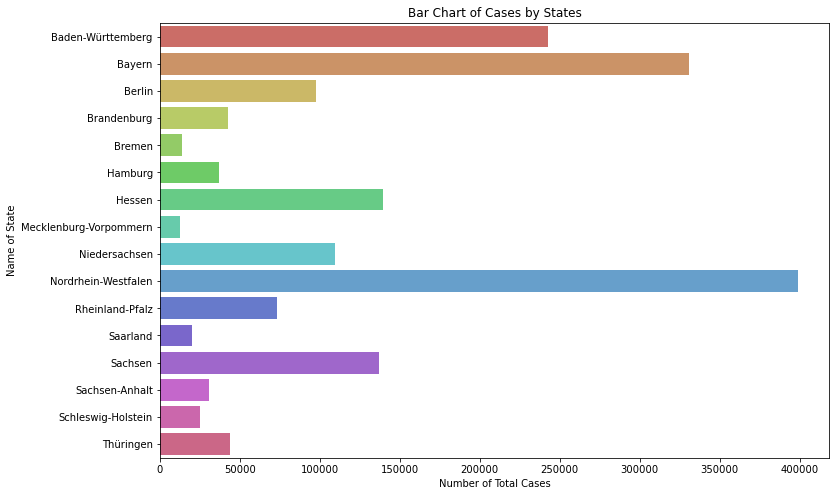

In [19]:
#states comparison

cov_by_state = df_covid.groupby("state").sum()
cov_by_state.sort_values("cases",ascending = True)
#width = 0.25

plt.figure(figsize=(12,8))
sns.barplot(cov_by_state.cases, cov_by_state.index, palette= 'hls')
plt.title("Bar Chart of Cases by States")
plt.xlabel("Number of Total Cases")
plt.ylabel("Name of State")
#plt.legend()
plt.show()

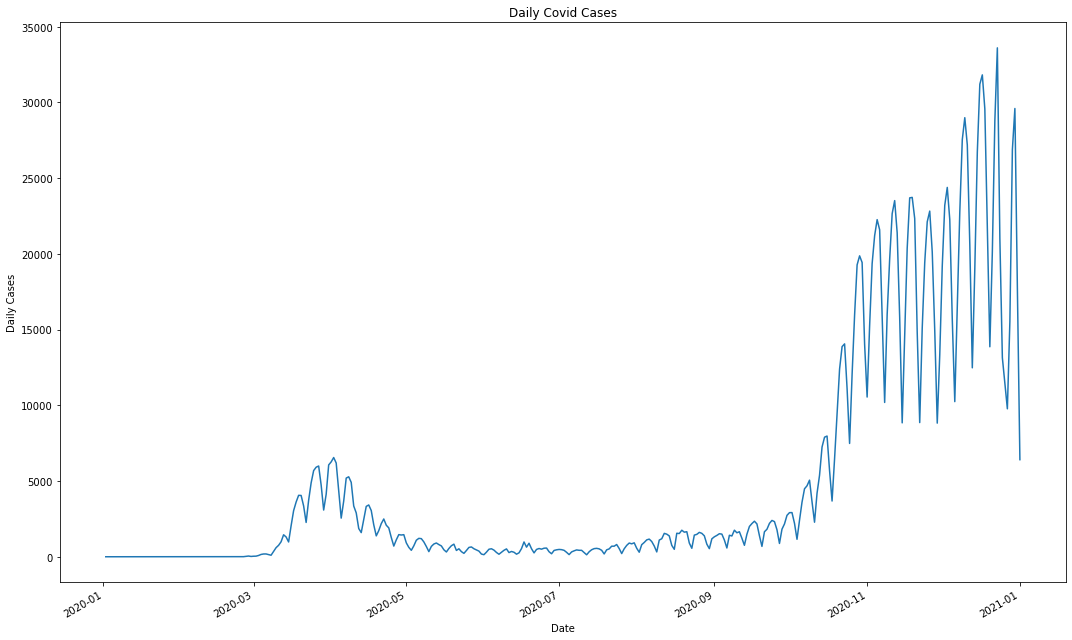

In [20]:
#plotting the daily covid cases according to the date

df_daily_cases = df_covid.groupby("date").sum()


#sns.set_style("darkgrid")  #change
plt.figure(figsize=(15,9))
plt.title("Daily Covid Cases")
sns.lineplot(data = df_daily_cases["cases"])
plt.ylabel("Daily Cases")
plt.xlabel("Date")

plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()


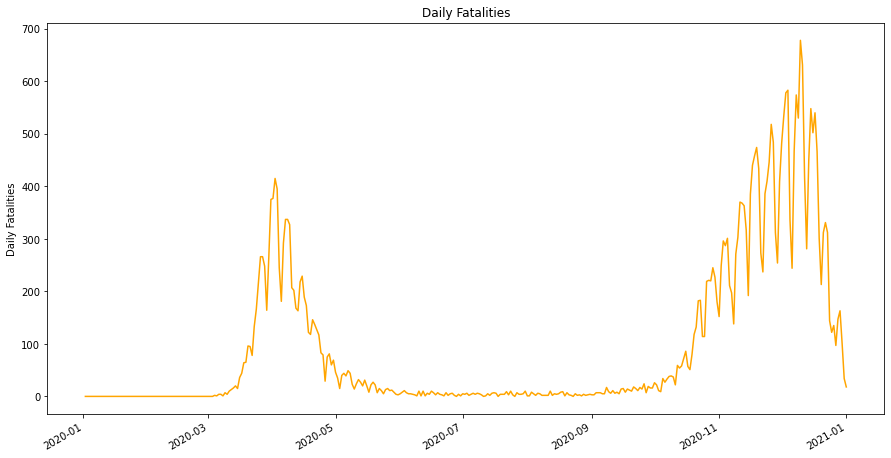

In [21]:
#daily fatalities

plt.figure(figsize=(15,8))
plt.title("Daily Fatalities")
sns.lineplot(data = df_daily_cases["deaths"], color = "orange")
plt.ylabel("Daily Fatalities")
plt.gcf().autofmt_xdate()
plt.show()

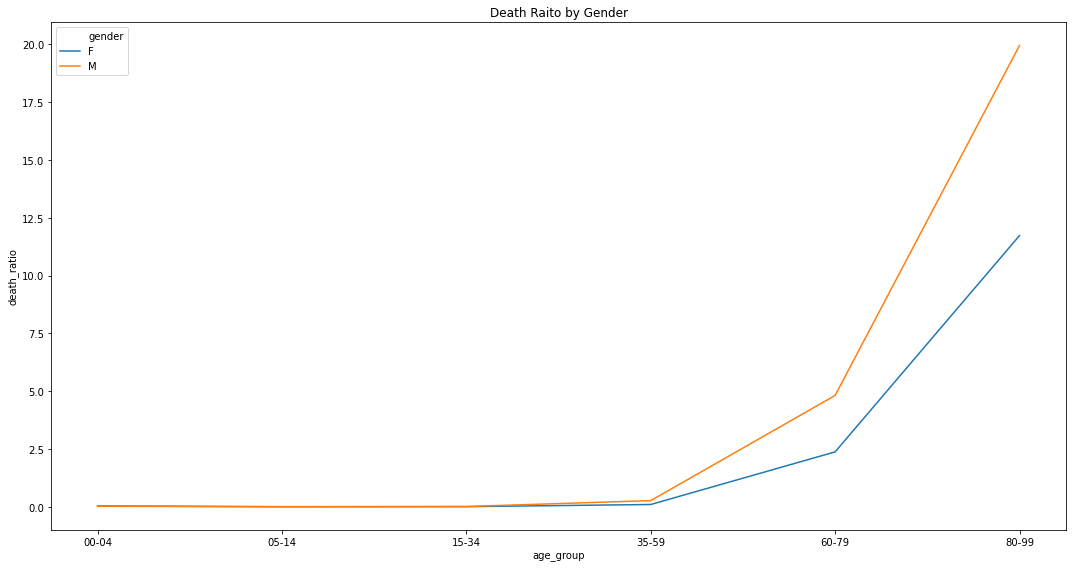

In [22]:
#death ratio by gender

df_gender = df_covid.groupby(by=["age_group","gender"]).sum().reset_index()
df_gender["death_ratio"] = 100 * df_gender["deaths"] / df_gender["cases"]

plt.figure(figsize=(15,8))
sns.lineplot(data = df_gender,x="age_group",y="death_ratio",hue = "gender")
plt.title("Death Raito by Gender")
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

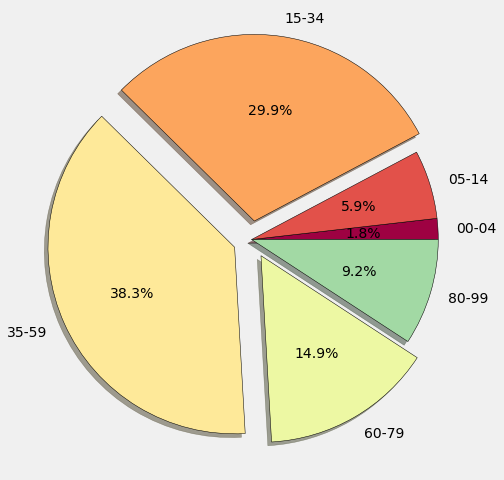

In [23]:
#which age group is most affected by the virus

plt.style.use("fivethirtyeight")
plt.tight_layout()

cov_by_age = df_covid.groupby("age_group").sum()
cov_by_age.sort_values("cases",ascending = False)

cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0,0,0.1,0.1,0.1,0]

plt.figure(figsize = (8,8))
cases_pie = plt.pie(cov_by_age.cases, labels = cov_by_age.index, autopct = "%1.1f%%",shadow = True , colors = colors
                   ,wedgeprops={'edgecolor':'black'},explode = explode)



#now we will see if the death rates are following the same as infections. To visualize the deathswe measure the ratio of deaths to number of cases for each age group individually.For each age group how many of those infected by the virsu ended up dead

Text(0, 0.5, 'Death Ratio Percentage')

<Figure size 432x288 with 0 Axes>

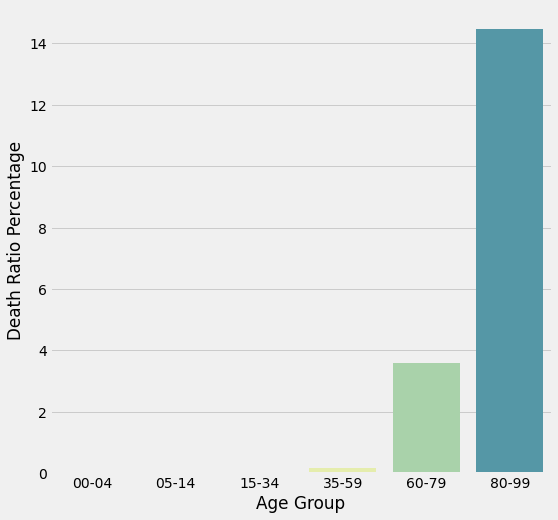

In [24]:
death_ratio = cov_by_age.deaths / cov_by_age.cases *100.0
cov_by_age["death_ratio"] = death_ratio
cov_by_age.sort_values("death_ratio", ascending = False )

plt.style.use("fivethirtyeight")

plt.tight_layout()
plt.figure(figsize=(8,8))
sns.barplot(y = cov_by_age.death_ratio, x =cov_by_age.index, palette = "Spectral")
plt.xlabel("Age Group")
plt.ylabel("Death Ratio Percentage")


#if we comapre the barplot and pie chart it is clear that age group of 35-59 are the most infected group by the virus, the people in the age group 60-99 are most likely to die if they got infected. More than 25% of the infected people of the age group 80-99 died from the virus. 

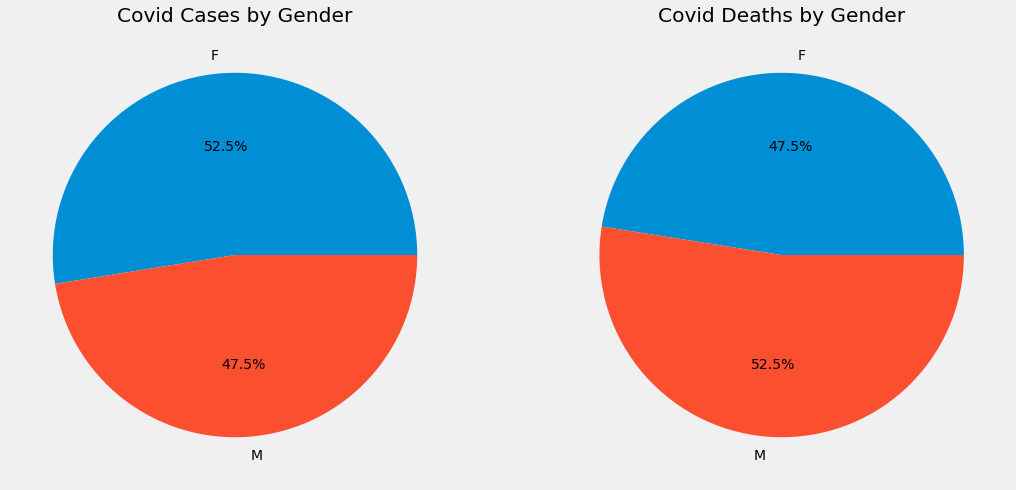

In [29]:
#which genfer is affected more ny the virus

cov_by_gender = df_covid.groupby('gender').sum()
cov_by_gender.sort_values('cases',ascending = False , inplace = True)
the_grid = GridSpec(2,2)


plt.figure(figsize=(16,20))
plt.subplot(the_grid[0,0], aspect = 1, title = 'Covid Cases by Gender')
case_pie = plt.pie(cov_by_gender.cases, labels = cov_by_gender.index, autopct = '%1.1f%%')

plt.subplot(the_grid[0,1],aspect = 1, title = 'Covid Deaths by Gender')
death_pie = plt.pie(cov_by_gender.deaths, labels =cov_by_gender.index, autopct = '%1.1f%%')



##seems like the virus does not descriminate that much between genders in infection

Text(0, 0.5, 'Deaths')

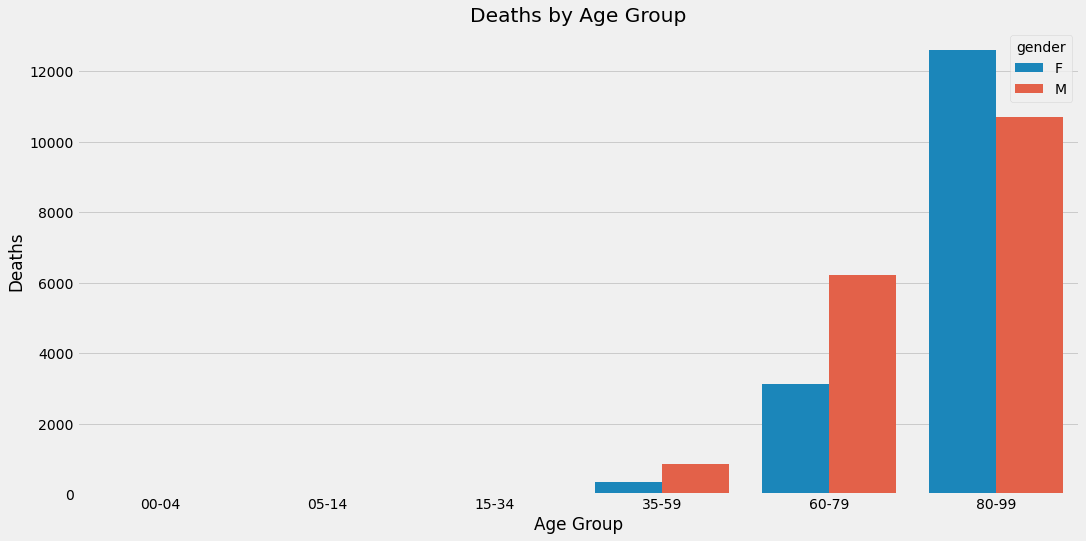

In [33]:
#How the number of deaths is distributed over different age groups of both genders

cov_by_sg = df_covid.groupby(['age_group','gender'], as_index = False).sum()

plt.figure(figsize=(16,8))
sns.barplot(y = cov_by_sg.deaths, x = cov_by_sg.age_group, hue = cov_by_sg.gender, data = cov_by_sg)
plt.title('Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')

##the death case for females in the age group of 80-99 are more than males. Besides that males seems to have higher mortality rate in other age groups. 

In [ ]:
df_covid.head()


In [31]:
df_state_covid = df_covid.groupby(by = 'state',as_index=False).sum()
df_state_demo = df_dmo[['state','population']].groupby(by='state',as_index = False).sum()
df_state = df_mp.merge(df_state_covid, how = "left", left_on = "GEN", right_on = "state")
df_state = df_state.merge(df_state_demo, how = "left", left_on = "GEN", right_on = "state")
df_state.drop(columns = ["state_x", "state_y"])

df_state["case_ratio"] = df_state["cases"] * (1000 / df_state ["population"])
df_state["death_ratio"] = df_state["deaths"] * (1000 / df_state ["population"])
df_state["death_case_ratio"]= 100 * df_state["deaths"] / df_state["cases"]

df_state.set_index("GEN" )

,geometry,state_x,cases,deaths,recovered,state_y,population,case_ratio,death_ratio,death_case_ratio
GEN,,,,,,,,,,
Hamburg,"MULTIPOLYGON (((3578695.661 5955304.456, 35781...",Hamburg,37286,658,27236,Hamburg,1841179.00,20.25,0.36,1.76
Niedersachsen,"MULTIPOLYGON (((3354775.046 5942939.764, 33546...",Niedersachsen,109797,2016,92551,Niedersachsen,7982448.00,13.75,0.25,1.84
Bremen,"MULTIPOLYGON (((3468658.496 5898364.974, 34702...",Bremen,13700,201,11380,Bremen,682986.00,20.06,0.29,1.47
Nordrhein-Westfalen,"POLYGON ((3477450.781 5820982.368, 3479895.578...",Nordrhein-Westfalen,398661,6701,326307,Nordrhein-Westfalen,17932651.00,22.23,0.37,1.68
Hessen,"POLYGON ((3535084.230 5721608.644, 3535279.888...",Hessen,139349,2917,109223,Hessen,6265809.00,22.24,0.47,2.09
Rheinland-Pfalz,"POLYGON ((3418896.770 5638774.098, 3419770.012...",Rheinland-Pfalz,73541,1459,54190,Rheinland-Pfalz,4084844.00,18.00,0.36,1.98
Baden-Württemberg,"MULTIPOLYGON (((3475285.294 5283087.348, 34749...",Baden-Württemberg,242723,4894,190409,NaN,nan,nan,nan,2.02
Bayern,"POLYGON ((3609551.484 5269631.549, 3610838.499...",Bayern,330830,6811,264169,Bayern,13076721.00,25.30,0.52,2.06
Saarland,"POLYGON ((3360522.937 5500321.672, 3361336.128...",Saarland,20111,440,17249,Saarland,990509.00,20.30,0.44,2.19


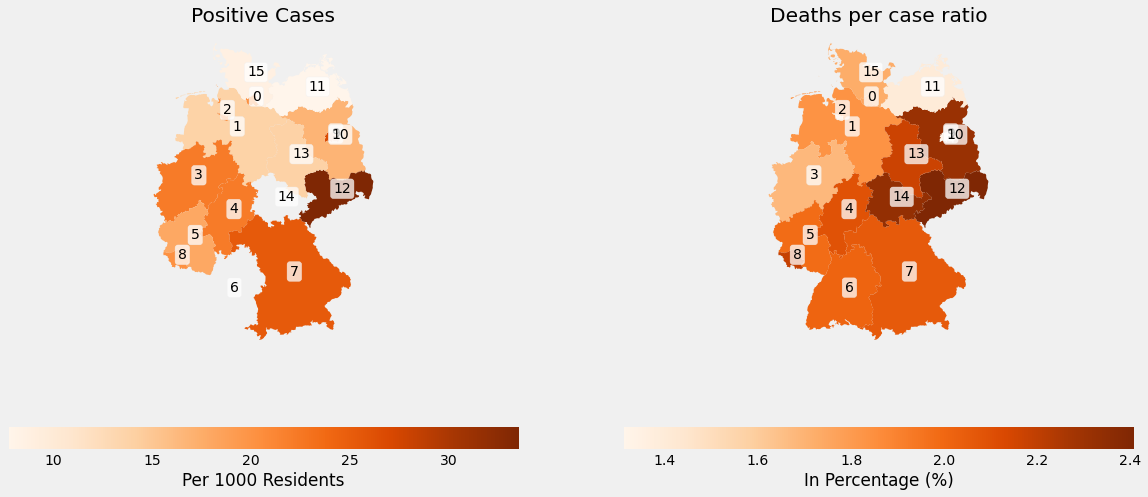

In [32]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,8))
df_state.plot(column = "case_ratio", legend = True, legend_kwds = {"label": "Per 1000 Residents",
                                                                   "orientation" : "horizontal"}, cmap = "Oranges", ax = ax1)

for i, geo in df_state.centroid.iteritems(): 
    ax1.annotate(s=i, xy=[geo.x , geo.y], color = "black", bbox = dict(boxstyle = 'round, pad =0.2', fc = 'white', alpha = 0.75))

    ax1.set_title("Positive Cases")   
    
    
df_state.plot(column="death_case_ratio",legend = True, legend_kwds={"label": "In Percentage (%)",
                                                                   "orientation": "horizontal"}, cmap = "Oranges", ax = ax2)

for i, geo in df_state.centroid.iteritems():
    ax2.annotate(s=i, xy=[geo.x, geo.y], color = "black", bbox = dict(boxstyle = 'round, pad =0.2', fc = 'white', alpha = 0.75))
ax2.set_title("Deaths per case ratio")

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

plt.show()






In [30]:
#cumulated cases over time by state

cov = df_covid.groupby(by=["state","date"]).sum()
cov = cov.replace([np.inf, -np.inf], 0)
cov = cov.replace(np.nan, 0)
cov["cases_cumsum"] = cov.groupby(level = -2)["cases"].cumsum()
cov["deaths_cumsum"] = cov.groupby(level = -2)["deaths"].cumsum()
cov = cov.reset_index()


In [ ]:
plt.figure(figsize=(16,8))
line = sns.lineplot(data = cov.sort_values("cases_cumsum", ascending = False), x = "date", y = "cases_cumsum", hue = "state")
line.legend(bbox_to_anchor = (1.01, 1), loc = 'upper left')
plt.title("Cumulated cases over time by state")
plt.tight_layout()
plt.show()

In [ ]:
df_covid

In [ ]:
plt.figure(figsize=(10,10))
df_covid['state'].value_counts()

In [9]:
df_dmo.head()

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [10]:
df_covid.head()


,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1
